# Importing

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
url = 'https://raw.githubusercontent.com/HarshSingh2009/Data-Detectives-Analyze-this-3.0/main/Dataset.csv'
df = pd.read_csv(url )

## Data Cleaning

In [3]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

mode_value = df['previous_year_rating'].mode()[0]
median_value = df['previous_year_rating'].median()

# Replace missing values with a combination of mode and median
df['previous_year_rating'].fillna(np.random.choice([mode_value, median_value], p=[0.5, 0.5]), inplace=True)

# from sklearn.impute import KNNImputer
# n_neighbors = 5

# imputer = KNNImputer(n_neighbors=n_neighbors)
# imputed_data = imputer.fit_transform(df[["previous_year_rating"]])[:,0]
# df['previous_year_rating'] = imputed_data


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\3583471797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\3583471797.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [4]:
duplicates_before = df[df.duplicated()]
print("Duplicate Records :", len(duplicates_before))

Duplicate Records : 0


In [61]:
# Creating age bins
bins = [20, 30, 40, 50, 60, 100] 
labels = ['20-30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# df.drop('age', axis=1, inplace=True)

## Feature Engineering 

In [6]:
df['score_service_ratio'] = df['avg_training_score'] / df['length_of_service']
df['training_interaction'] = df['no_of_trainings'] * df['avg_training_score']
df['awards_trainings_ratio'] = df['awards_won?'] / (df['no_of_trainings'] + 1)


In [36]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,score_service_ratio,training_interaction,awards_trainings_ratio
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170,18.528547,79.770636,0.010835
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137,16.644950,43.879135,0.071228
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.297297,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,8.000000,53.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,12.600000,64.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,22.666667,84.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,99.000000,710.000000,0.500000


## Data Exploration

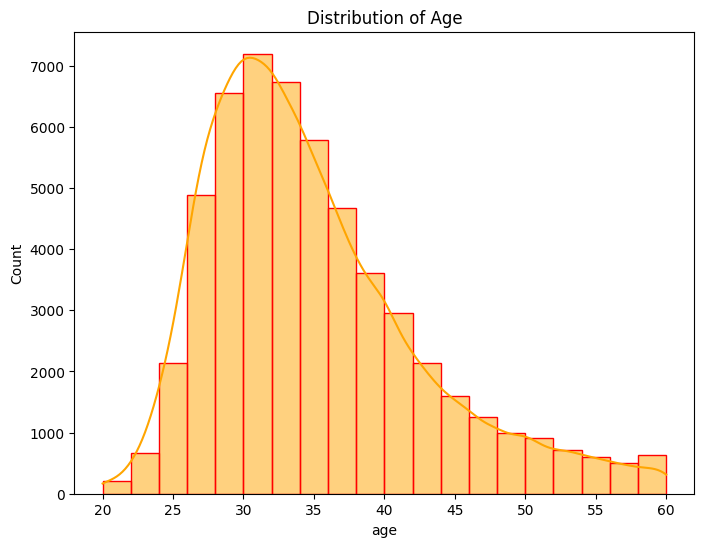

In [33]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=20, color='orange', edgecolor= 'red')
plt.title('Distribution of Age')
plt.show()


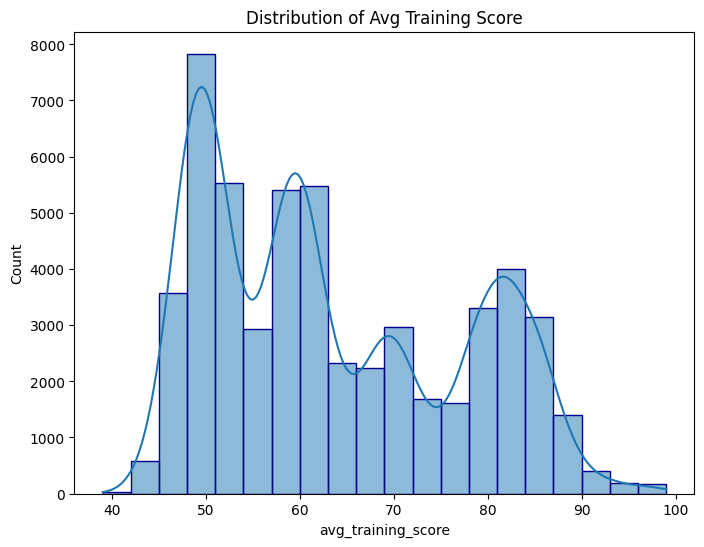

In [35]:

# Distribution of Avg Training Score
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_training_score'], kde=True, bins=20, edgecolor='darkblue')
plt.title('Distribution of Avg Training Score')
plt.show()


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\3227178248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender',legend= ['Male','Female'], data=df, palette='icefire')


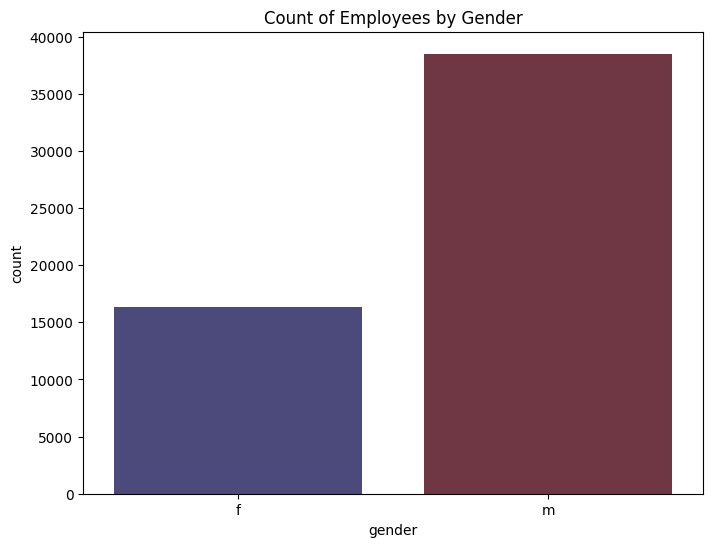

In [42]:

# Count of Employees by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='icefire')
plt.title('Count of Employees by Gender')
plt.show()



C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\2228073021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_promoted', data=df, palette='viridis')


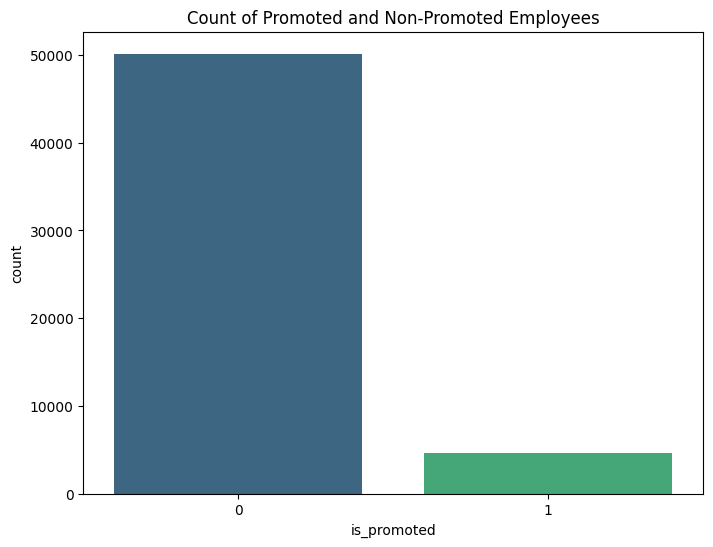

In [43]:
# Count of Promoted and Non-Promoted Employees
plt.figure(figsize=(8, 6))
sns.countplot(x='is_promoted', data=df, palette='viridis')
plt.title('Count of Promoted and Non-Promoted Employees')
plt.show()


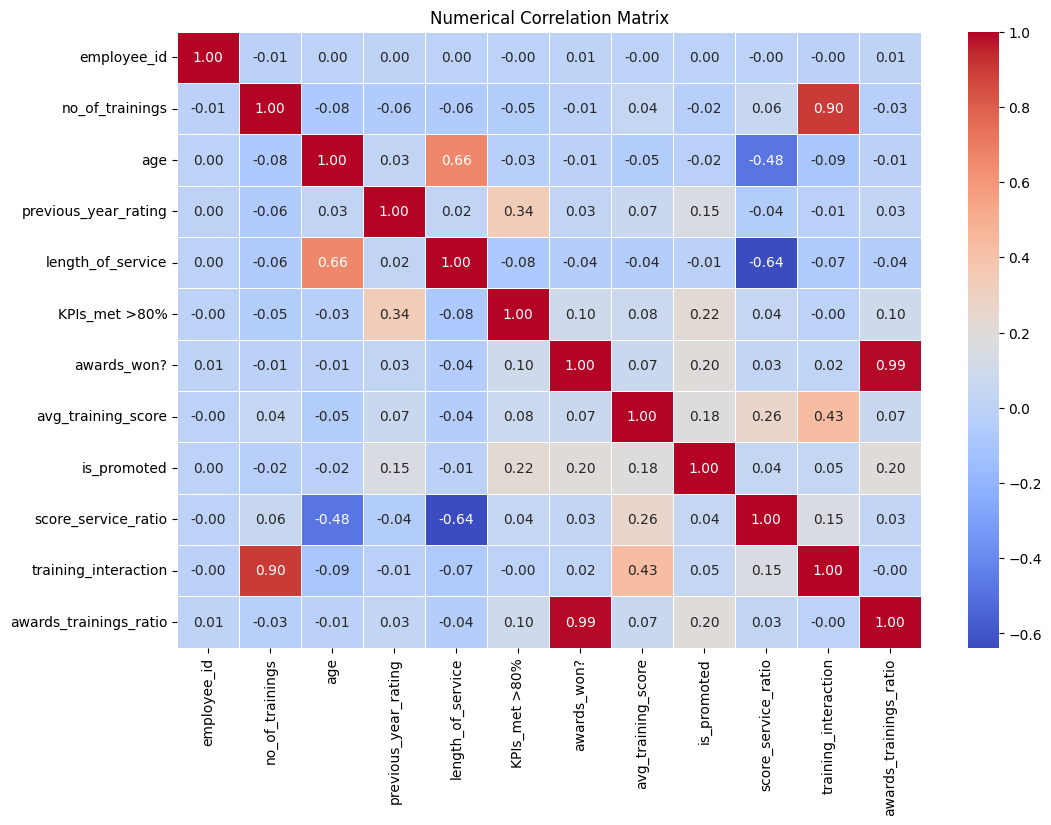

In [12]:

# Correlation Analysis for Numerical Variables
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Numerical Correlation Matrix')
plt.show()


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\1996043351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=promoted_df, palette='pastel')


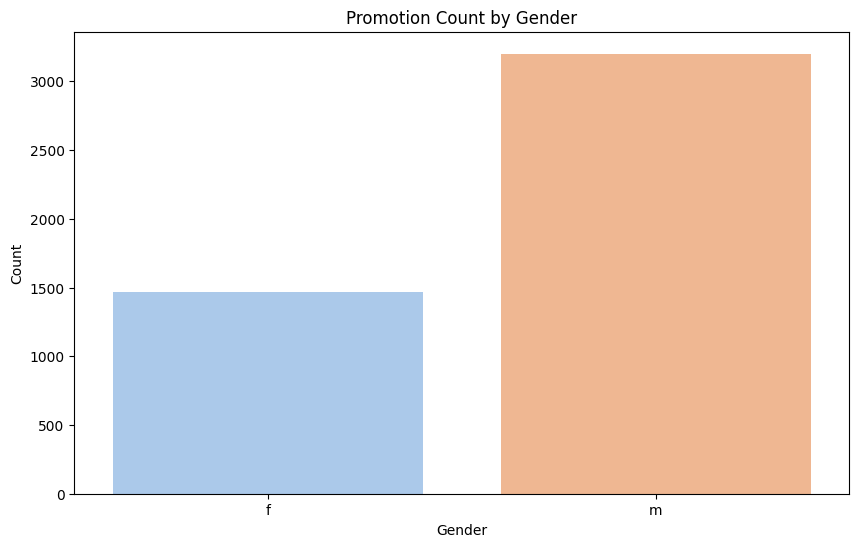

In [14]:

# Promotion Analysis - Focusing on Promoted Instances
promoted_df = df[df['is_promoted'] == 1]

# Visualize Promotion Rates by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=promoted_df, palette='pastel')
plt.title('Promotion Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\1819558234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=promoted_df, palette='tab10')


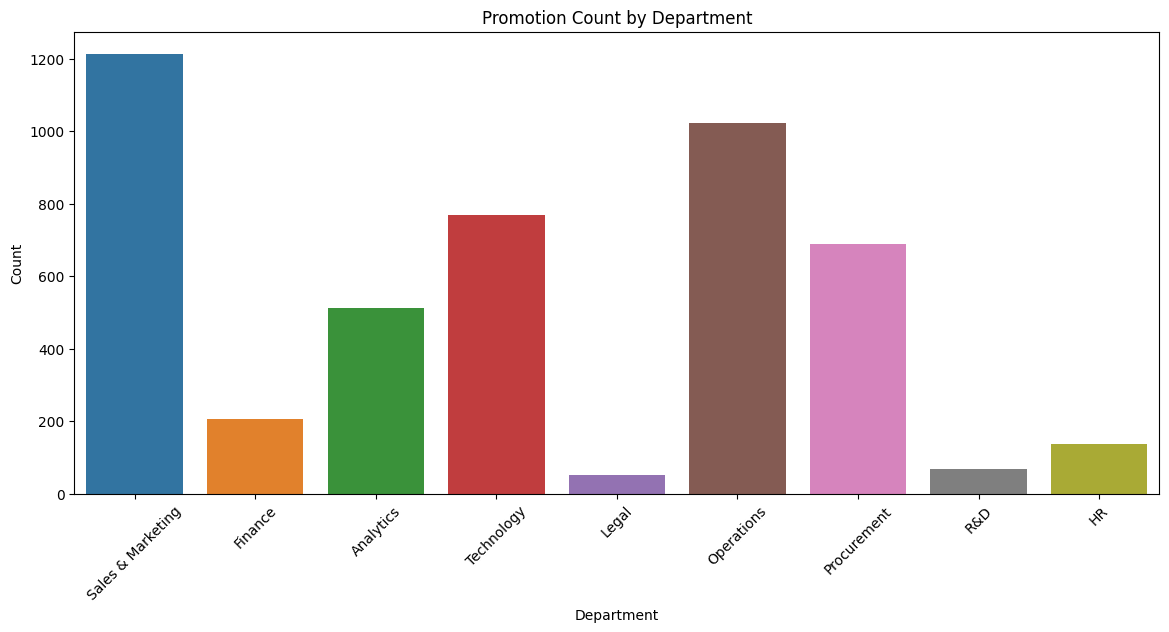

In [27]:

# Visualize Promotion Rates by Department
plt.figure(figsize=(14, 6))
sns.countplot(x='department', data=promoted_df, palette='tab10')
plt.title('Promotion Count by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\1641185157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KPIs_met >80%', data=promoted_df, palette='viridis')


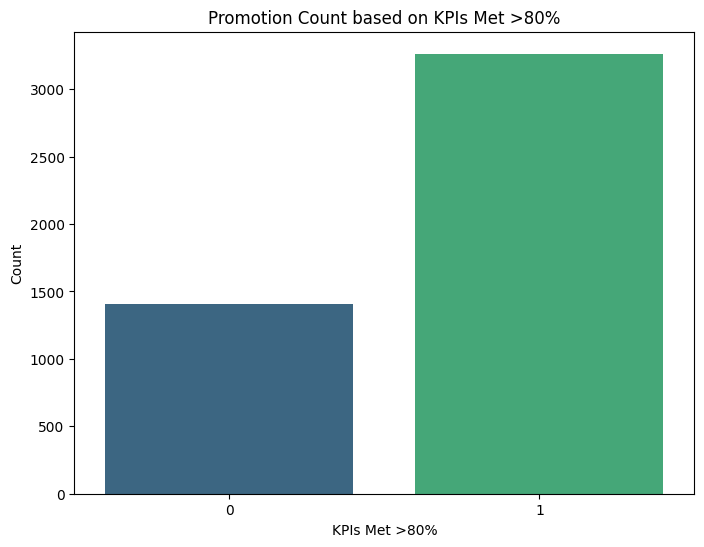

In [47]:
# Visualize Promotion Rates by KPIs Met
plt.figure(figsize=(8, 6))
sns.countplot(x='KPIs_met >80%', data=promoted_df, palette='viridis')
plt.title('Promotion Count based on KPIs Met >80%')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Count')
plt.show()



C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\3157625202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='previous_year_rating', data=promoted_df, palette='tab10')


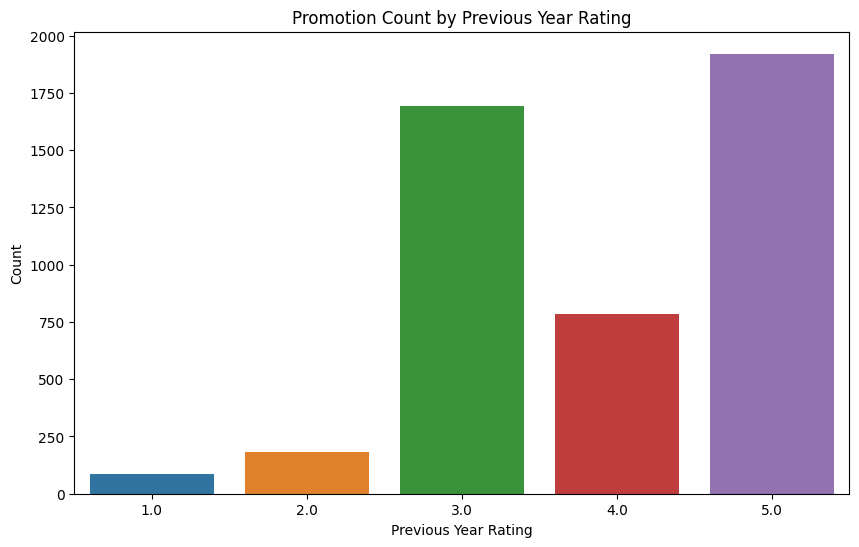

In [48]:
# Visualize Promotion Rates by Previous Year Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_year_rating', data=promoted_df, palette='tab10')
plt.title('Promotion Count by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.show()






C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\2663602415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=df, palette='tab10')


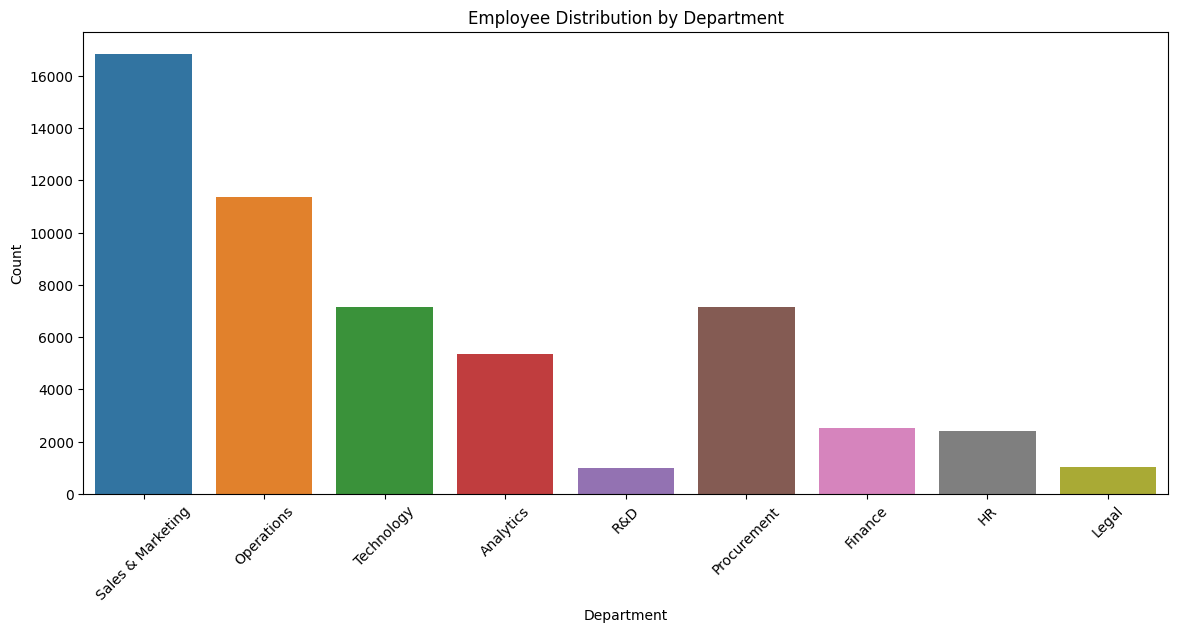

In [44]:

# Employee Distribution Analysis
# Visualize the distribution of employees by department
plt.figure(figsize=(14, 6))
sns.countplot(x='department', data=df, palette='tab10')
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\2447928537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df, palette='dark')


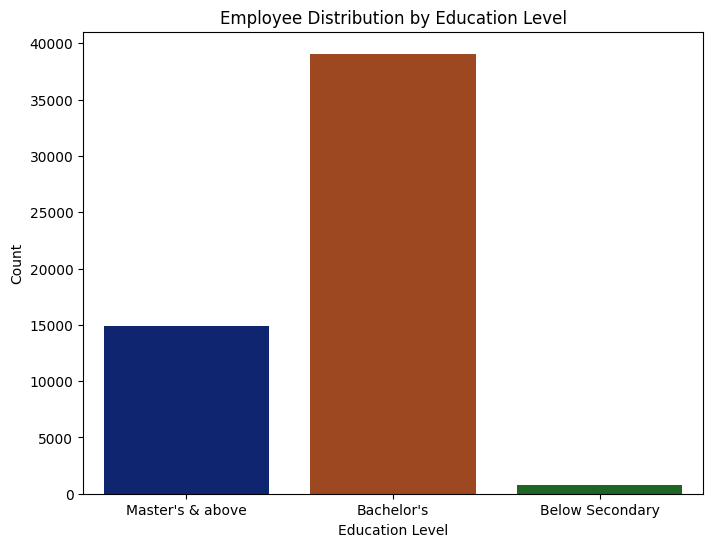

In [50]:
# Visualize the distribution of employees by education level
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df, palette='dark')
plt.title('Employee Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()



C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\253907157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


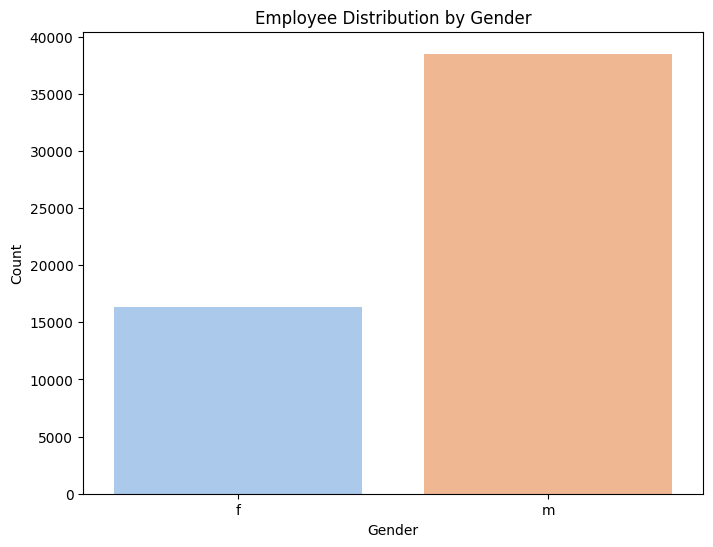

In [20]:
# Visualize the distribution of employees by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Employee Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


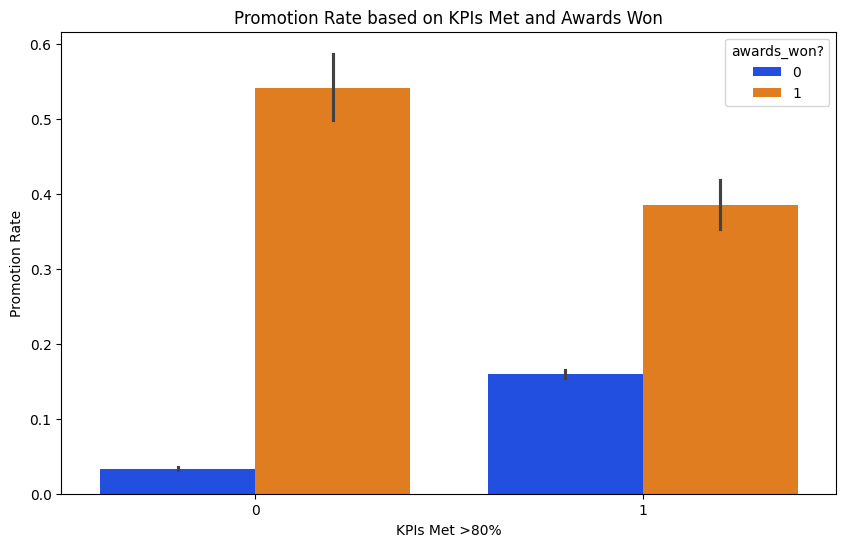

In [51]:
# Promotion Rate by KPIs Met and Awards Won
plt.figure(figsize=(10, 6))
sns.barplot(x='KPIs_met >80%', y='is_promoted', hue='awards_won?', data=df, palette='bright')
plt.title('Promotion Rate based on KPIs Met and Awards Won')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Promotion Rate')
plt.show()


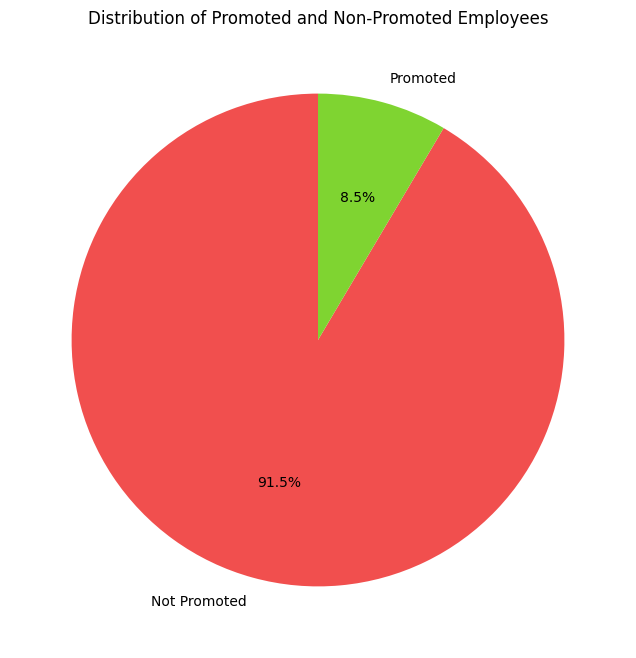

In [54]:
# Pie Chart for Promotion Status
promotion_counts = df['is_promoted'].value_counts()
labels = ['Not Promoted', 'Promoted']
plt.figure(figsize=(8, 8))
plt.pie(promotion_counts, labels=labels, autopct='%1.1f%%', colors=['#F14F4E', '#7FD431'], startangle=90)
plt.title('Distribution of Promoted and Non-Promoted Employees')
plt.show()


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\4290953001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y='avg_training_score', data=df, palette='colorblind')


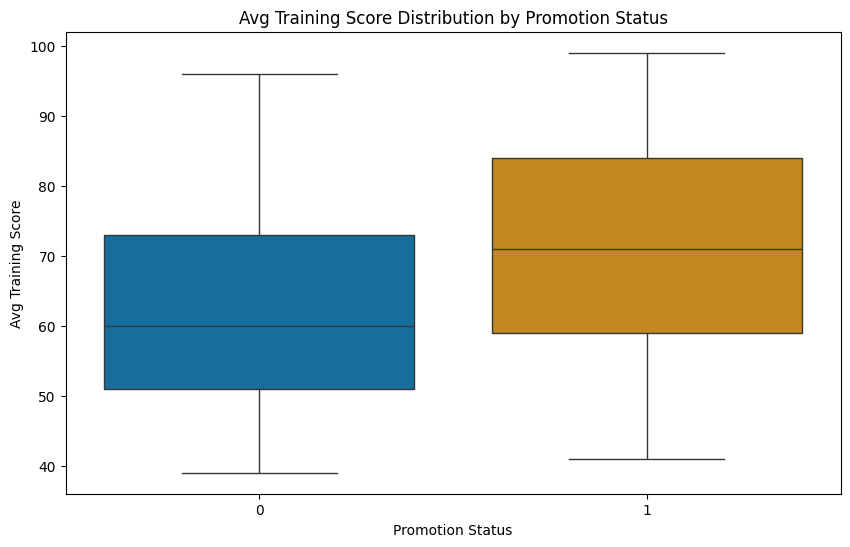

In [56]:
# Boxplot for Avg Training Score by Promotion Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_promoted', y='avg_training_score', data=df, palette='colorblind')
plt.title('Avg Training Score Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Avg Training Score')
plt.show()


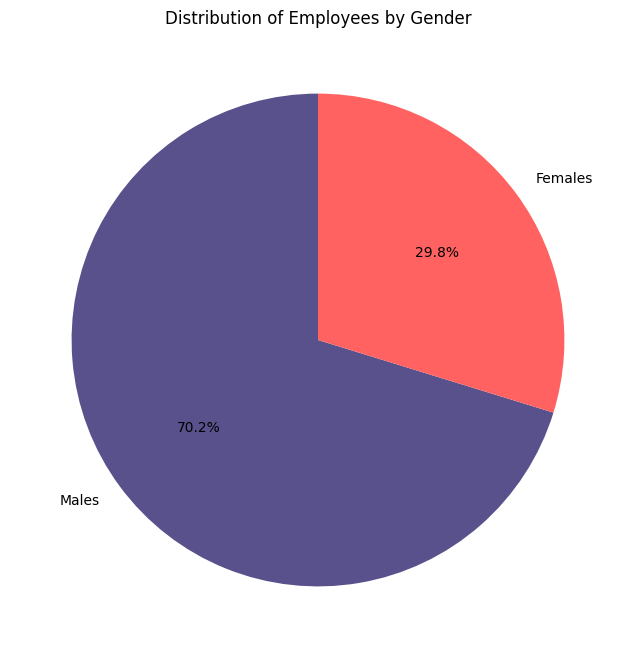

In [46]:
# Pie Chart for Gender Distribution
gender_counts = df['gender'].value_counts()
labels_gender = gender_counts.index
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Males', 'Females'], autopct='%1.1f%%', colors=['#58518C', '#FF6260'], startangle=90)
plt.title('Distribution of Employees by Gender')
plt.show()


C:\Users\owner's\AppData\Local\Temp\ipykernel_2604\3850767250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='is_promoted', data=df, palette='bright')


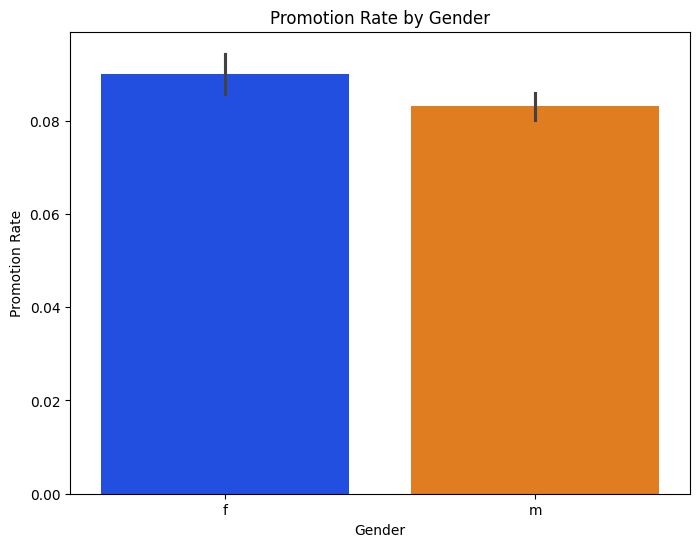

In [57]:
# Promotion Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='is_promoted', data=df, palette='bright')
plt.title('Promotion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Promotion Rate')
plt.show()


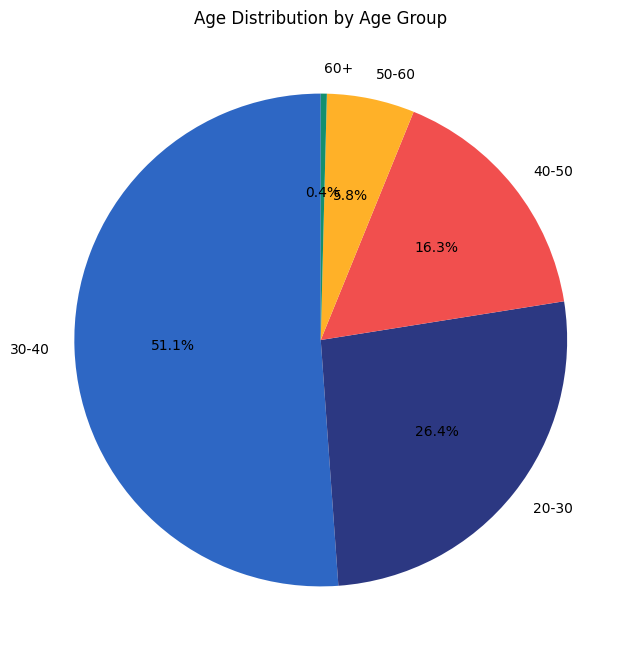

In [65]:
age_counts = df['age_group'].value_counts()
labels_age = age_counts.index

plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=labels_age, autopct='%1.1f%%', startangle=90, colors=['#2E67C4', '#2C3882', '#F14F4E', '#FFB128', '#148F6F'])
plt.title('Age Distribution by Age Group')
plt.show()

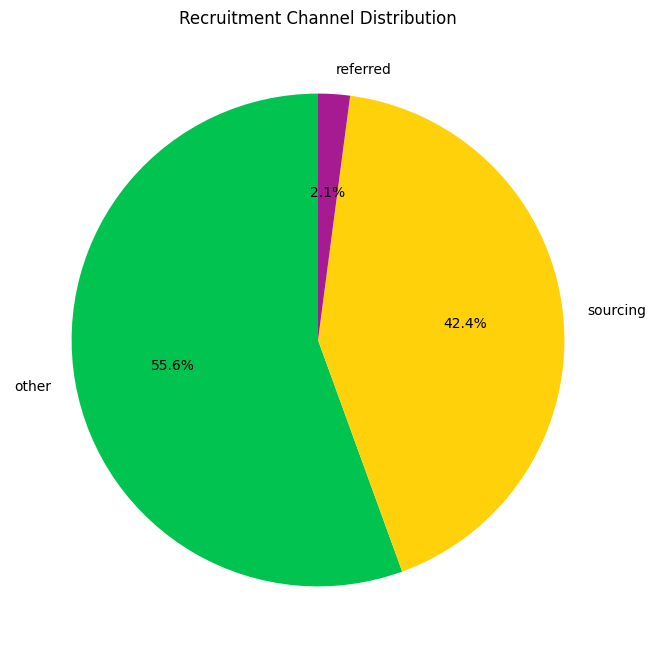

In [67]:
# Pie Chart for Recruitment Channel Distribution
channel_counts = df['recruitment_channel'].value_counts()
labels_channel = channel_counts.index

plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=labels_channel, autopct='%1.1f%%', startangle=90, colors=['#01C450', '#FFD10B', '#A61B92'])
plt.title('Recruitment Channel Distribution')
plt.show()
